In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import StrMethodFormatter

from src.datasets import load_iris
from src.shadow_learn import ShadowedSetEstimator

In [2]:
X, y, y_labels, t = load_iris()

In [3]:
X_train = [[-0.90846333, -0.75156873],
 [ 0.94236171, -0.54182226],
 [-2.58734619,  0.52047364],
 [ 2.56332271,  0.2759745 ],
 [ 0.29780791, -0.34701652],
 [ 1.94401705,  0.18741522],
 [-2.67384469, -0.1066917 ],
 [-2.53757337,  0.51036755],
 [-2.88795857, -0.57079803],
 [ 2.61648461,  0.34193529],
 [ 1.66193495,  0.2420384 ],
 [-2.71539062, -0.16955685],
 [-2.50791723, -0.13905634],
 [ 0.81245555, -0.16233157],
 [-0.07034289, -0.70253793],
 [ 2.61419383,  0.55836695],
 [-2.469056,    0.13788731],
 [-2.63284791, -0.19007583],
 [ 2.41939122,  0.30350394],
 [ 1.11624072, -0.08421401],
 [-2.41007734,  0.41808001],
 [ 1.38766825, -0.20403099],
 [ 3.39687992,  0.54716805],
 [ 3.49926548,  0.45677347],
 [ 0.33112695, -0.21118014],
 [-2.82089068, -0.08210451],
 [-2.54323491,  0.44003175],
 [-2.6225262,   0.81808967],
 [ 1.46406132,  0.50418983],
 [ 0.16451343, -0.67966147],
 [-2.38386932,  1.34475434],
 [-2.64832273,  0.31913667],
 [ 0.23454059, -0.33192183],
 [-0.174864 ,  -0.25181557],
 [-2.78743398, -0.22774019],
 [-2.71566519, -0.24268148],
 [ 0.92757294,  0.46823621],
 [ 1.52566363, -0.37502085],
 [ 3.2323429 ,  1.37052404],
 [-2.68420713,  0.32660731],
 [ 2.12285398, -0.21085488],
 [-2.8403213 , -0.22057634],
 [ 1.29832982, -0.76101394],
 [-2.62522846,  0.60680001],
 [ 2.53172698, -0.01184224],
 [ 0.26233576, -0.5478933 ],
 [-2.35617109, -0.03120959],
 [ 3.07652162,  0.68576444],
 [ 0.35678657, -0.06682383],
 [ 1.34459422, -0.77641543],
 [ 0.13499495, -0.31170964],
 [-2.85221108, -0.93286537],
 [-0.19188449, -0.67749054],
 [ 1.90486293,  0.04804751],
 [ 0.89016045, -0.03381244],
 [ 1.97081495, -0.18112569],
 [-2.59032303,  0.23605934],
 [ 0.37523823, -0.29162202],
 [-2.72859298,  0.33392456],
 [ 1.22042897,  0.40803534],
 [ 1.33104142,  0.24466952],
 [-0.01019007, -0.72057487],
 [ 2.91813423,  0.78038063],
 [ 1.37873698, -0.42120514],
 [ 0.71400821,  0.15037915],
 [ 2.14498686,  0.13890661],
 [ 1.19809737, -0.60557896],
 [-2.67384469, -0.1066917 ],
 [ 2.42816726,  0.37678197],
 [ 1.08713449,  0.07539039],
 [ 0.24519516, -0.26672804],
 [ 3.79468686,  0.25326557],
 [-2.64763667,  0.81998263],
 [ 1.90474358,  0.11881899],
 [ 1.38966613, -0.28288671],
 [ 0.81286779, -0.370679  ],
 [-2.58846205, -0.19739308],
 [ 3.48876538,  1.17154454],
 [ 2.16537886,  0.21528028],
 [-2.20883295,  0.44269603],
 [-3.22520045, -0.50327991],
 [ 1.25762518, -0.179137  ],
 [ 2.3875644,   0.46251925],
 [ 1.5852673,  -0.53930705],
 [-2.27989736,  0.74778271],
 [ 1.41407223, -0.57492506],
 [-0.5110862,  -1.26249195],
 [ 2.27585365,  0.33338653],
 [ 2.84096093,  0.37274259],
 [-2.54268576,  0.58628103],
 [ 0.92050265, -0.18239036],
 [ 0.46303099, -0.66952655],
 [ 1.28479459,  0.68543919],
 [ 1.29646885, -0.32756152],
 [ 0.51109806, -0.10228411],
 [-2.56239095,  0.37468456],
 [ 2.10765373,  0.37148225],
 [ 0.22887905, -0.40225762],
 [ 1.41407223, -0.57492506],
 [-2.61314272,  0.02152063],
 [-2.67384469, -0.1066917 ],
 [-0.30733476, -0.36508661],
 [-2.59715948,  1.10002193],
 [ 0.35553304, -0.50321849],
 [-2.7464372,  -0.31112432]]
y_train = [-1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,
 -1, -1, -1, -1, -1, -1, -1 ,-1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,
 -1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,
 -1 , 1,  1 ,-1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
  1, -1,  1, -1, -1, -1, -1, -1, -1]
X_test = np.array([[ 2.9320051,   0.35237701],
 [ 0.98404455 ,-0.12436042],
 [ 1.4431026  ,-0.14380129],
 [ 1.09522371 , 0.28389121],
 [ 1.29066965 ,-0.11642525],
 [ 2.31430339 , 0.18260885],
 [ 0.18096721 ,-0.82560394],
 [ 0.0432464  ,-0.58148945],
 [-2.3105317  , 0.39786782],
 [ 1.92245088 , 0.40927118],
 [-2.64354322 , 1.1861949 ],
 [-2.98184266 ,-0.48025005],
 [ 2.31967279 ,-0.24554817],
 [ 1.94924878  ,0.04073026],
 [-2.63982127  ,0.31929007],
 [ 1.90162908  ,0.11587675],
 [-0.75146714 ,-1.00110751],
 [-2.50652679 , 0.65193501],
 [-2.30312854 , 0.10552268],
 [-2.19907796 , 0.87924409],
 [ 0.64169028 , 0.01907118],
 [-2.62648199 , 0.17040535],
 [ 0.89964086 , 0.32961098],
 [ 2.34975798 ,-0.04188255],
 [ 1.16885347 ,-0.1645025 ],
 [ 0.93241075 , 0.31919809],
 [ 0.58727485 ,-0.48328427],
 [-0.70708128 ,-1.00842476],
 [ 0.65959279 ,-0.35197629],
 [-2.86699985 , 0.0771931 ],
 [ 1.77964011 ,-0.50146479],
 [ 2.15873837 ,-0.21832553],
 [ 0.8072055  , 0.19505396],
 [-2.70391231 , 0.11501085],
 [ 1.80234045 ,-0.21615461],
 [-2.77013891 , 0.27105942],
 [-2.99829644 ,-0.33430757],
 [-2.88981954 ,-0.13734561],
 [-2.4055141  , 0.19591726],
 [ 1.55739627 , 0.26739258],
 [ 0.64043675 ,-0.41732348],
 [-3.21585769 , 0.14161557],
 [ 0.51938325 ,-1.19135169],
 [ 1.76404594 , 0.07851919],
 [ 1.04329778 , 0.22895691]])
y_test = [ 1, -1,  1, -1,  1,  1, -1, -1 ,-1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,
  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1]

In [4]:
clf = SVC(C=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9111111111111111

In [5]:
clf_pred = clf.predict(X_test)
pred_with_uncertain = np.array([a if a == b else 0 for a, b in zip(clf_pred, y_test)])
uncertain_indices = np.where(pred_with_uncertain == 0)

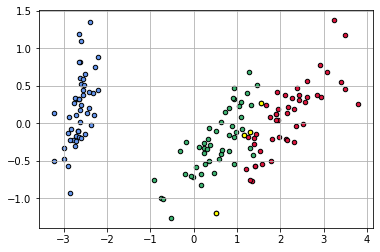

In [6]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
label_colors = ['cornflowerblue', 'mediumseagreen', 'crimson']
r = np.split(X_test, 2, axis=1)
xx, yy = r[0], r[1]
xc, yc = xx[uncertain_indices], yy[uncertain_indices]
fig, ax = plt.subplots()
for lab, col in zip(labels, label_colors):
    ax.scatter(X[y_labels == lab, 0],
            X[y_labels == lab, 1],
            label=lab,
            c=col, s=20, edgecolors='k')
ax.scatter(xc, yc, color='yellow', s=20, edgecolors='k')
ax.grid(True)

plt.show()